In [230]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
data1=pd. read_csv('winemag-data-130k-v2.csv')
data2=pd. read_csv('winemag-data_first150k.csv')
import cufflinks as cf
cf.go_offline()

In [231]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [232]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [233]:
data1.drop(['Unnamed: 0','region_1','region_2','taster_name','taster_twitter_handle','title'], axis=1, inplace=True)

In [234]:
del data2['Unnamed: 0']

In [235]:
data2.drop(['region_1','region_2'],axis=1,inplace=True)

In [236]:
frames=[data1,data2]
result=pd.concat(frames)

In [237]:
data=result.reset_index()
del data['index']

In [238]:
data.head()

,country,description,designation,points,price,province,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Pinot Noir,Sweet Cheeks


In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      280833 non-null  object 
 1   description  280901 non-null  object 
 2   designation  197701 non-null  object 
 3   points       280901 non-null  int64  
 4   price        258210 non-null  float64
 5   province     280833 non-null  object 
 6   variety      280900 non-null  object 
 7   winery       280901 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 17.1+ MB


In [240]:
datra = data.isnull()
col = datra.columns.values
alldata = 280901
dic = {}
for i in col:
    if i != 'points':
        dd = datra.groupby(i)['points'].count()
        if len(dd) > 1:
            temp = dd.values[0]
            dic[i] = alldata - temp

In [164]:
dic

{'country': 68,
 'designation': 83200,
 'price': 22691,
 'province': 68,
 'variety': 1}

중복수치가 가리키는 것은 행수치를 단위검열중복수치로 하는 것이고, 먼저 중복수치를 삭제 한다. 

In [10]:
print('총 데이터행렬수: \n',data. shape)
print('각 변량의 수치형태: \n',data. dtypes)

총 데이터행렬수: 
 (280901, 8)
각 변량의 수치형태: 
 country         object
description     object
designation     object
points           int64
price          float64
province        object
variety         object
winery          object
dtype: object


data1과 data2 합병 후, 중복수치량이 111226건 발견.
중복수치 data1:9984건, data2: 53081건 
이 두가지 다량의 중복수치가 총합된 것으로 짐작하고, 완전 상통하는 것은 아니다. 그래서 이 중복수치를 오나전히 삭제해버렸다.
삭제 후 남은 수치가 169675건의 수치결과가 나왔다.

In [11]:
print(data. duplicated().sum())
print(data1. duplicated().sum())
print(data2. duplicated() .sum())
data. drop_duplicates(keep='first',inplace=True)
data.reset_index()
data. shape

111226
9984
53081


(169675, 8)

식별수치중의 결실수치의 상황을 보면,
이번 수치분석의 총연구 변량은 country, points, price.
3 변량의 결실수치현황을 알아 볼 필요가 있다.

In [12]:
data.isnull().any()

country         True
description    False
designation     True
points         False
price           True
province        True
variety         True
winery         False
dtype: bool

In [13]:
data[data.country.isnull()]

,country,description,designation,points,price,province,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,Chardonnay,Ross-idi
11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20.0,NaN,Melnik,Orbelus
11348,NaN,"Light and fruity, this is a wine that has some...",Partager,82,NaN,NaN,White Blend,Barton & Guestier
14030,NaN,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25.0,NaN,White Blend,St. Donat
16000,NaN,"Jumpy, jammy aromas of foxy black fruits are s...",Valle de los Manantiales Vineyard,86,40.0,NaN,Tannat,Familia Deicas
16749,NaN,Winemaker: Bartho Eksteen. This wooded Sauvy s...,Cape Winemakers Guild Vloekskoot Wooded,91,NaN,NaN,Sauvignon Blanc,Bartho Eksteen


country의 결실수치가 60건으로, 이 데이터에 큰 영향은 없다. 
그래서 dupplicated방식으로 삭제한다. 

In [14]:
data = data.dropna(subset=['country'], axis = 0)

In [15]:
pricnul=data[data['price'].isnull()]
pricnul.reset_index(inplace=True)
pricnul. shape

(12835, 9)

총결실수치는 12839건으로, 결실수치는 5%이상.

In [16]:
country_pricnul=pd.value_counts(pricnul. country)
country_pricnul

France          6219
Italy           3753
Portugal        1136
Austria          673
US               349
New Zealand      142
Spain            119
South Africa     118
Germany           73
Australia         72
Chile             66
Argentina         57
Israel            17
Greece             8
Slovenia           7
Brazil             5
England            4
Egypt              3
Croatia            3
Uruguay            3
Tunisia            2
Canada             2
Georgia            2
Hungary            1
Turkey             1
Name: country, dtype: int64

본 결실수치는 어느나라에서 왔는 지 검사
위와 같이 결실수치나라와 그에 대한 결실수치수량에 대한 결과만 알수 있기 때문에 
원본 수치중의 국가변량을 입력하고, 각 국가의 결실评分의 수치점수와 그 나라의 총 조사수치의 비중을 계산한다. 결과는 다음과 같다.

In [17]:
country_pricnul=pd. value_counts(pricnul. country)
country_pric=pd. value_counts(data. country)
country_pricnul=pd. DataFrame(country_pricnul)
country_pric=pd.DataFrame(country_pric)
country_pricnul. rename(columns={'country':'nulsum'},inplace=True)
country_pric.rename(columns={'country':'sum'},inplace=True)
merge=pd.merge(country_pricnul, country_pric, left_index=True, right_index=True)
merge['ratio']=merge['nulsum']/merge['sum']
cm = sns.light_palette("red", as_cmap=True)
merge.style.background_gradient(cmap=cm)


,nulsum,sum,ratio
France,6219,27220,0.228472
Italy,3753,25016,0.150024
Portugal,1136,6914,0.164304
Austria,673,3968,0.169607
US,349,70922,0.004921
New Zealand,142,2594,0.054742
Spain,119,8833,0.013472
South Africa,118,2194,0.053783
Germany,73,2795,0.026118
Australia,72,4412,0.016319


결실수치가 5%이상인 국가가 너무 많다. 대표적인 프랑스, 이탈리아, 포르투갈, 오스트리아으 평균치로 대체.
그외 국가 결측치를 삭제 dropna()

In [18]:
grouped=data['price'].groupby(data['country'])
for name, group in grouped:
    if name=='Italy':
        mean=group.mean()
data.loc[(data.price.isnull())&(data.country=='Italy'),['price']]=mean

In [19]:
grouped=data['price'].groupby(data['country'])
for name, group in grouped:
    if name=='Portugal':
        mean=group.mean()
data.loc[(data.price.isnull())&(data.country=='Portugal'),['price']]=mean

In [20]:
grouped=data['price'].groupby(data['country'])
for name, group in grouped:
    if name=='Austria':
        mean=group.mean()
data.loc[(data.price.isnull())&(data.country=='Austria'),['price']]=mean

In [21]:
grouped=data['price'].groupby(data['country'])
for name, group in grouped:
    if name=='France':
        mean=group.mean()
data.loc[(data.price.isnull())&(data.country=='France'),['price']]=mean

In [22]:
data3 = data.dropna(subset=['price'], axis =0)

In [23]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168561 entries, 0 to 279610
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      168561 non-null  object 
 1   description  168561 non-null  object 
 2   designation  118651 non-null  object 
 3   points       168561 non-null  int64  
 4   price        168561 non-null  float64
 5   province     168561 non-null  object 
 6   variety      168560 non-null  object 
 7   winery       168561 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 11.6+ MB


In [24]:
data3.isnull().any()
data3.reset_index(inplace=True)

In [25]:
data3 =data3.drop('index', axis =1)

In [27]:
data3.isnull().any()
data3[data3.variety.isnull()]

,country,description,designation,points,price,province,variety,winery
81807,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,Carmen


In [28]:
data3.isnull().any()
data3[data3.variety.isnull()]
data3.drop(index=[81844],inplace=True)
data3 = data3.reset_index()

In [29]:
data3.set_index('index')

,country,description,designation,points,price,province,variety,winery
index,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,38.955368,Sicily & Sardinia,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...
168556,US,A Syrah-Grenache blend that's dry and rustical...,Bungalow Red,84,15.000000,California,Syrah-Grenache,Casa Barranca
168557,Portugal,Oreo eaters will enjoy the aromas of this wine...,30-year old tawny,84,26.838006,Port,Port,Casa Santa Eufemia
168558,US,"Outside of the vineyard, wines like this are w...",NaN,84,6.000000,California,Merlot,Delicato


이상치를 처리 q1 일분위수 q2 삼분위수

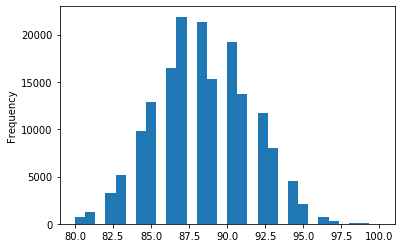

In [30]:
q1 = data3.points.quantile(q=0.25)
q2 = data3.points.quantile(q=0.75)
iqr = q2 - q1
data3.points.plot(kind='hist',bins=30)

In [31]:
q1 = data3.points.quantile(q=0.25)
q2 = data3.points.quantile(q=0.75)
iqr = q2 - q1
print('상한이상치:\n',any(data.points>q2+1.5*iqr))
print('하한이상치:\n',any(data.points<q1-1.5*iqr))

상한이상치:
 True
하한이상치:
 False


In [32]:
q1 = data3.points.quantile(q=0.25)
q2 = data3.points.quantile(q=0.75)
iqr = q2 - q1
print('상한이상치:\n',any(data.points>q2+3*iqr))
print('상한이상치초과수치:\n',data[data.points>q2+3*iqr].points)
print(data[data.points>100])
print('하한이상치:\n',any(data.points<q1-1.5*iqr))

상한이상치:
 False
상한이상치초과수치:
 Series([], Name: points, dtype: int64)
Empty DataFrame
Columns: [country, description, designation, points, price, province, variety, winery]
Index: []
하한이상치:
 False


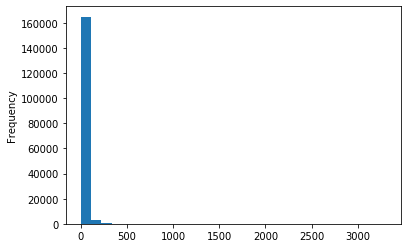

In [33]:
q1 = data3.price.quantile(q=0.25)
q2 = data3.price.quantile(q=0.75)
iqr = q2 - q1
data.price.plot(kind='hist', bins=30)

In [34]:
q1 = data3.points.quantile(q=0.25)
q2 = data3.points.quantile(q=0.75)
iqr = q2 - q1
print('상한이상치:\n',any(data.price>q2+3*iqr))
print('하한이상치:\n',any(data.price<q1-3*iqr))
print('상한이상치초과수치:\n',data[data.price>q2+3*iqr].price.shape)
print('하한이상치초과수치:\n',data[data.price<q1-3*iqr].price.shape)
#print(data[data.points>100])

상한이상치:
 True
하한이상치:
 True
상한이상치초과수치:
 (4264,)
하한이상치초과수치:
 (157070,)


In [35]:
data3.loc[data3['index'] == 4264,'price']

4264    45.0
Name: price, dtype: float64

In [36]:
data3 = data3.dropna(subset=['country','province'], axis =0)

In [37]:
data3 = data3.dropna(subset=['variety','designation'], axis =0)

In [38]:
data3.reset_index(inplace=True)

In [39]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118650 entries, 0 to 118649
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   level_0      118650 non-null  int64  
 1   index        118650 non-null  int64  
 2   country      118650 non-null  object 
 3   description  118650 non-null  object 
 4   designation  118650 non-null  object 
 5   points       118650 non-null  int64  
 6   price        118650 non-null  float64
 7   province     118650 non-null  object 
 8   variety      118650 non-null  object 
 9   winery       118650 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 9.1+ MB


먼저 "scikit learn"-> 함수,class 모음에서 "LinearRegresssion"모듈을 가져 오겠습니다.

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
y_pred = []
y_true = []

In [42]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state = 42)

for train_index, test_index in kf.split(data3.price):
    df_test = data3.price.iloc[test_index]
    df_train = data3.price.iloc[train_index]

C:\Users\BIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



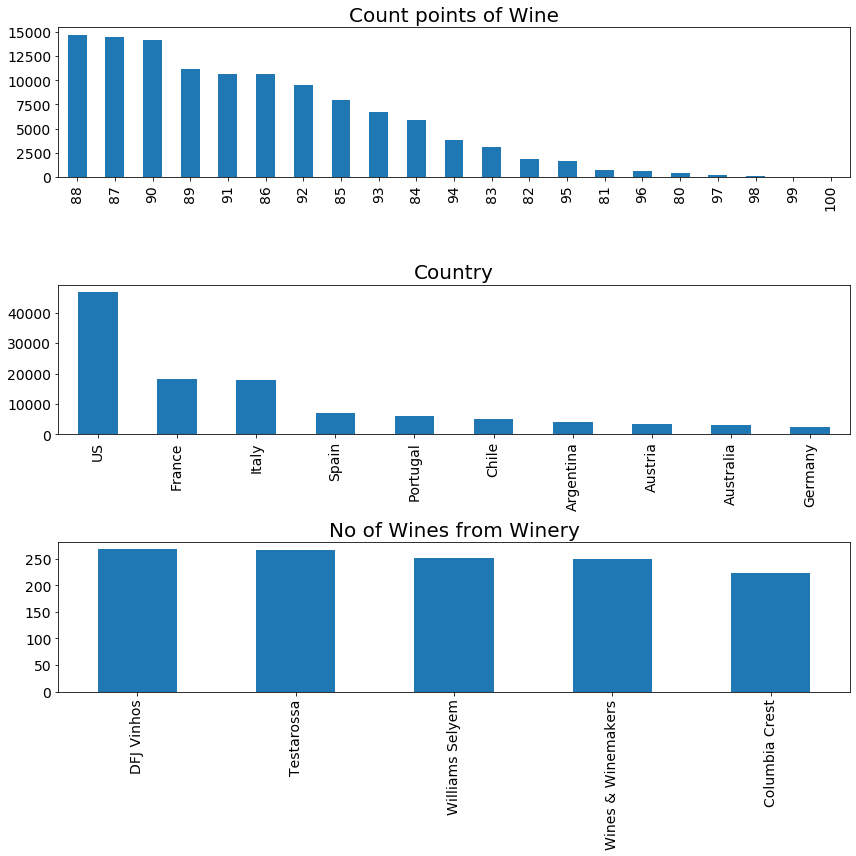

In [43]:
import matplotlib.pyplot as plt
#Creating a frame of rows and columns to place the plots
fig, axi = plt.subplots(3,1, figsize = (12,12))
#plot1
data3['points'].value_counts().plot.bar(
    ax = axi[0],
    fontsize = 14,
)
axi[0].set_title("Count points of Wine", fontsize = 20)
#Plot2
data3['country'].value_counts().head(10).plot.bar(
    ax = axi[1],
    fontsize = 14,
)
axi[1].set_title('Country', fontsize = 20)
#plot3
data3['winery'].value_counts().head().plot.bar(
    ax = axi[2],
    fontsize = 14,
)
axi[2].set_title("No of Wines from Winery", fontsize = 20)
fig.tight_layout()

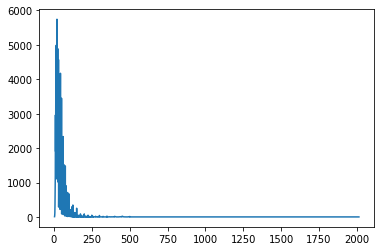

In [44]:
data3['price'].value_counts().sort_index().plot.line()

In [45]:
data3.isnull().count()

level_0        118650
index          118650
country        118650
description    118650
designation    118650
points         118650
price          118650
province       118650
variety        118650
winery         118650
dtype: int64

In [46]:
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

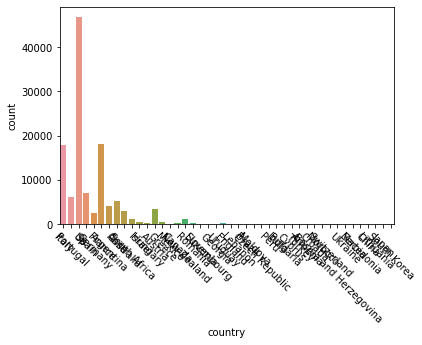

In [47]:
sns.countplot(data3['country'])
plt.xticks(rotation = - 45 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

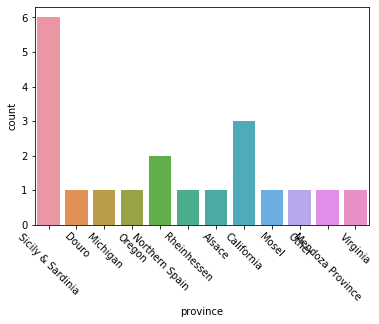

In [48]:
sns.countplot(data3['province'].head(20))
plt.xticks(rotation = - 45 )

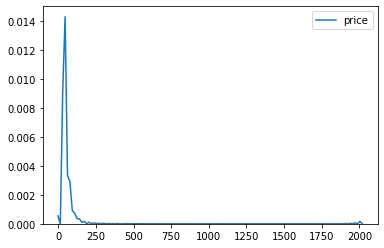

In [49]:
sns.kdeplot(data3['price'])

Text(0.5, 1.0, 'Price of Wine')

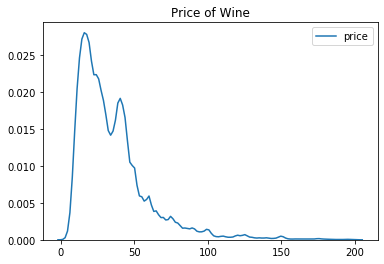

In [50]:
ax = sns.kdeplot(data3.query('price<200').price)
ax.set_title("Price of Wine")

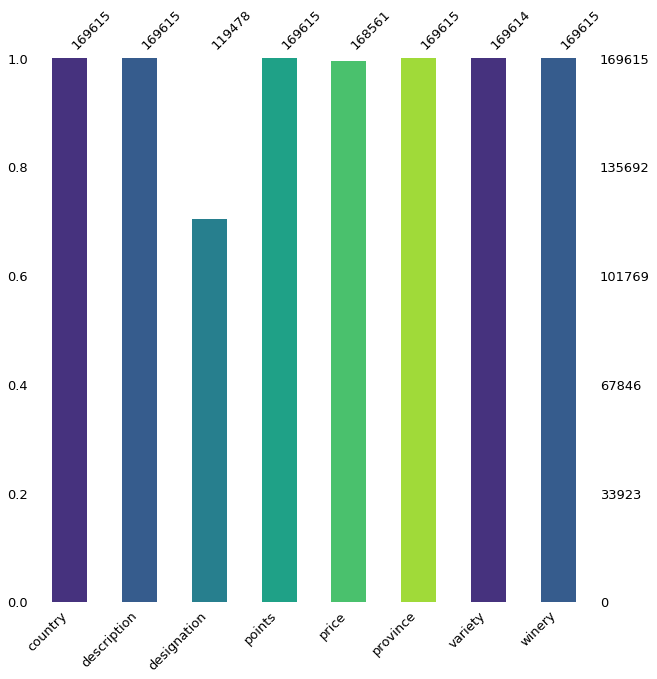

In [51]:
msno.bar(data,color = sns.color_palette('viridis'),fontsize = 13,figsize = (10,10))

In [52]:
data3.pivot_table('points',index = 'winery', columns = 'variety', aggfunc = 'mean')

variety,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Albarossa,Albarín,...,Xarel-lo,Xinisteri,Xinomavro,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası
winery,,,,,,,,,,,,,,,,,,,,,
1+1=3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Knots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 Percent Wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000 Stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,90.5,NaN,NaN,NaN
12 Linajes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ökonomierat Rebholz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Único Luis Miguel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
àMaurice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data4 = data3.loc[:,['description','points','price','variety','winery']]

 country-> 널값만 찾아서 제거,designation -> 열 확인 삭제 ,province -> 행만 삭제

In [54]:
data5 = data3.dropna(subset=['country'], axis =0)

In [55]:
data5 = data5.dropna(subset=['variety'], axis =0)

In [56]:
data5 = data5.drop('designation', axis = 1)

In [57]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118650 entries, 0 to 118649
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   level_0      118650 non-null  int64  
 1   index        118650 non-null  int64  
 2   country      118650 non-null  object 
 3   description  118650 non-null  object 
 4   points       118650 non-null  int64  
 5   price        118650 non-null  float64
 6   province     118650 non-null  object 
 7   variety      118650 non-null  object 
 8   winery       118650 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 9.1+ MB


<h2>designation: 구매처+원산지+포도주+type</h2><br>
<h2>winery: The winery that made the wine -> 양조장</h2><br>
<h2>variety: The type of grapes used to make the wine (ie Pinot Noir) -> 포도 종류</h2><br>
<h2>province : The province or state that the wine is from 주 또는 주(州)에서 와인이 유래</h2><br>
<h2>region1 : 찾는중</h2><br>
<h2>region2 : resion1의 함수적 종속</h2><br>

<h2> points and variety 현황</h2>
1. 포인트를 잘받는 와인 원재료(포도 종류) 상위 10개<br>
2. 보편적으로 쓰이는 포토 종류 상위 10개

In [ ]:
sns.scatterplot(data=data5, x="points", y="price", hue="variety")

Text(0, 0.5, 'points')

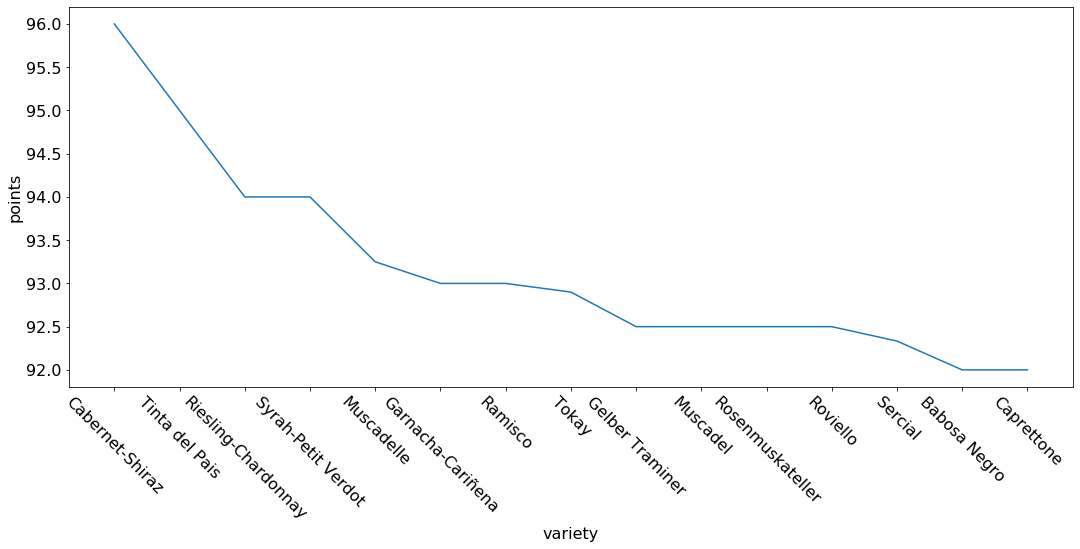

In [110]:
temp = data5.groupby('variety')['points'].mean().nlargest(15)
x1 = temp.index.values
y1 = temp.values
plt.rc('font', size = 16)
plt.figure(figsize = (18,7))
plt.plot(x1,y1, label='variety')
plt.xticks(rotation = - 45 )
plt.xlabel('variety')
plt.ylabel('points')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

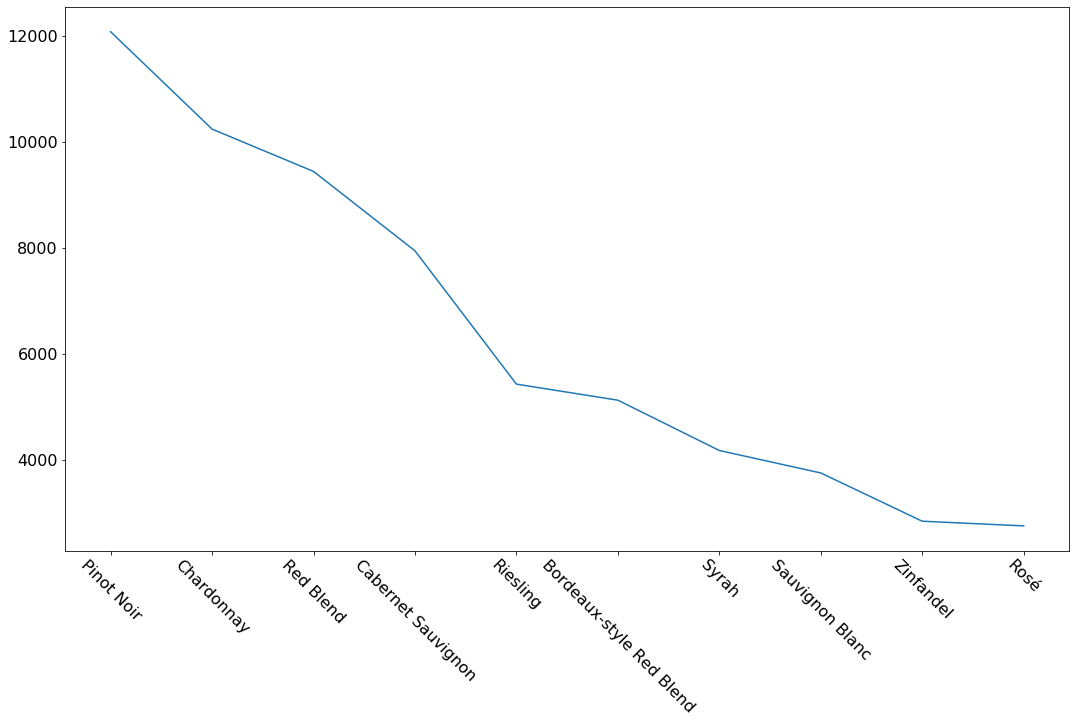

In [60]:
bb = data5.groupby('variety')['description' ].count().nlargest(10)
x1 = bb.index.values
y1 = bb.values
plt.rc('font', size = 16)
plt.figure(figsize = (18,10))
plt.plot(x1,y1, label='variety')
plt.xticks(rotation = - 45 )

총748개의 포토 종류

<h2>주에 따른 포인트 현황과 가격 현황</h2>

Text(0, 0.5, 'points')

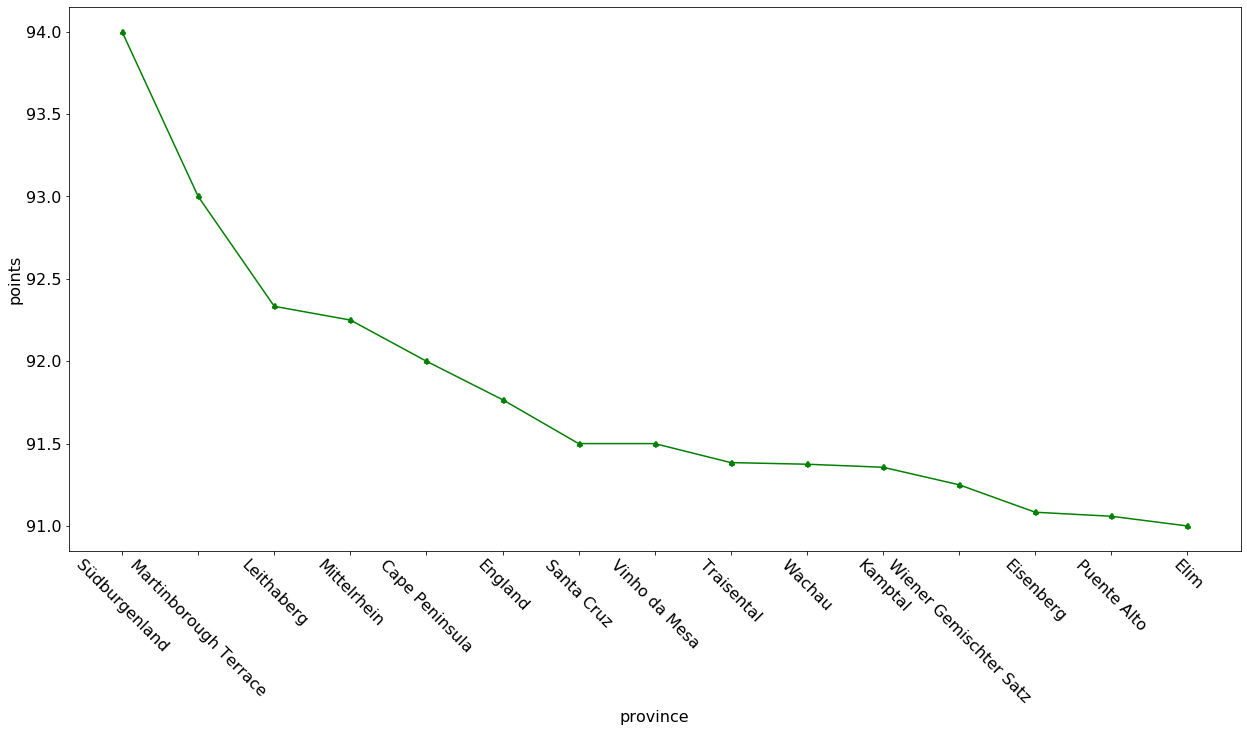

In [108]:
temp1 = data5.groupby('province')['points'].mean().nlargest(15)
x1 = temp1.index.values
y1 = temp1.values
plt.figure(figsize = (21,10))
plt.rc('font', size = 16)
plt.xticks(rotation = - 45 )
plt.plot(x1,y1, marker=r'$\clubsuit$', color = 'green')
plt.xlabel('province')
plt.ylabel('points')

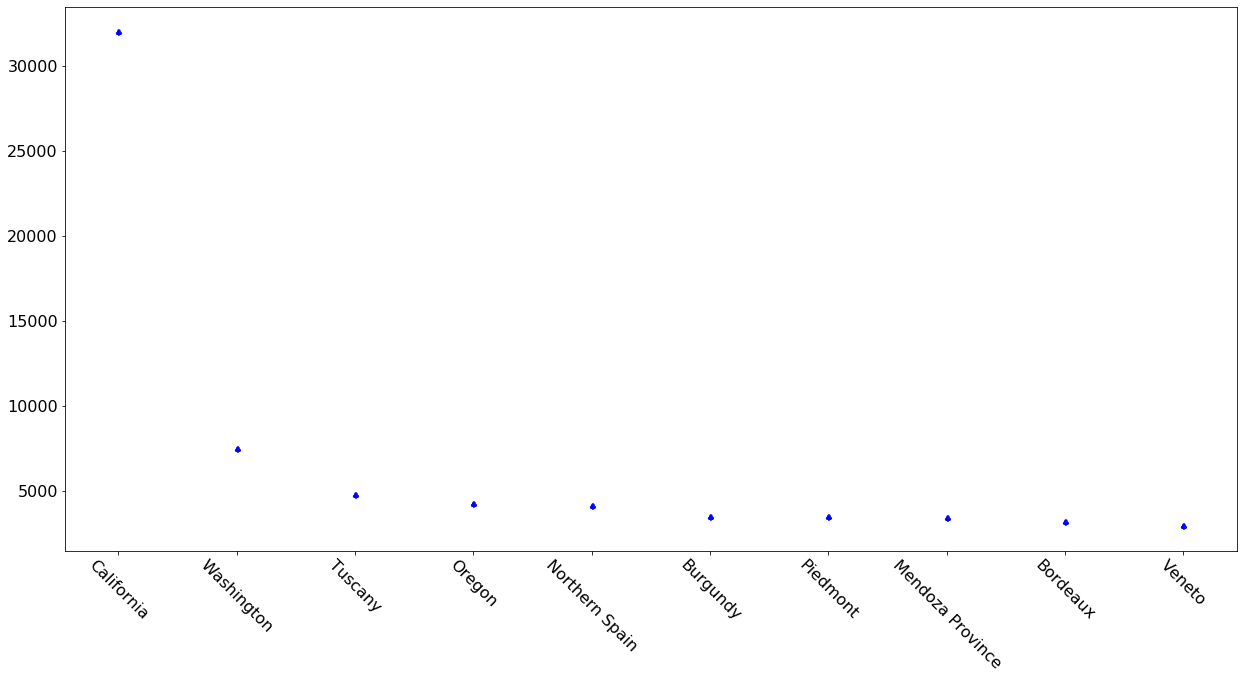

In [62]:
bb1 = data5.groupby('province')['description'].count().nlargest(10)
x1 = bb1.index.values
y1 = bb1.values
plt.figure(figsize = (21,10))
plt.rc('font', size = 16)
plt.xticks(rotation = - 45 )
plt.scatter(x1,y1, marker=r'$\clubsuit$', color = 'b')

In [88]:
temp2 = data5.groupby('province')['price'].mean().nlargest(20)
temp2

province
Colares                           201.333333
Olifants River                    100.000000
Santa Cruz                         77.500000
Champagne                          76.517649
Evia                               75.000000
Nevada                             75.000000
Rheingau                           73.706173
Tokaji                             72.636364
Buin                               70.625000
Rapel Valley-Casablanca Valley     70.000000
Leithaberg                         65.704552
Ahr                                65.000000
Cape Peninsula                     65.000000
Puente Alto                        63.529412
Haut-Judeé                         63.000000
Burgundy                           60.526106
Golan Heights                      60.000000
Martinborough Terrace              60.000000
Moscatel do Douro                  59.135202
Omaka Valley                       59.000000
Name: price, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

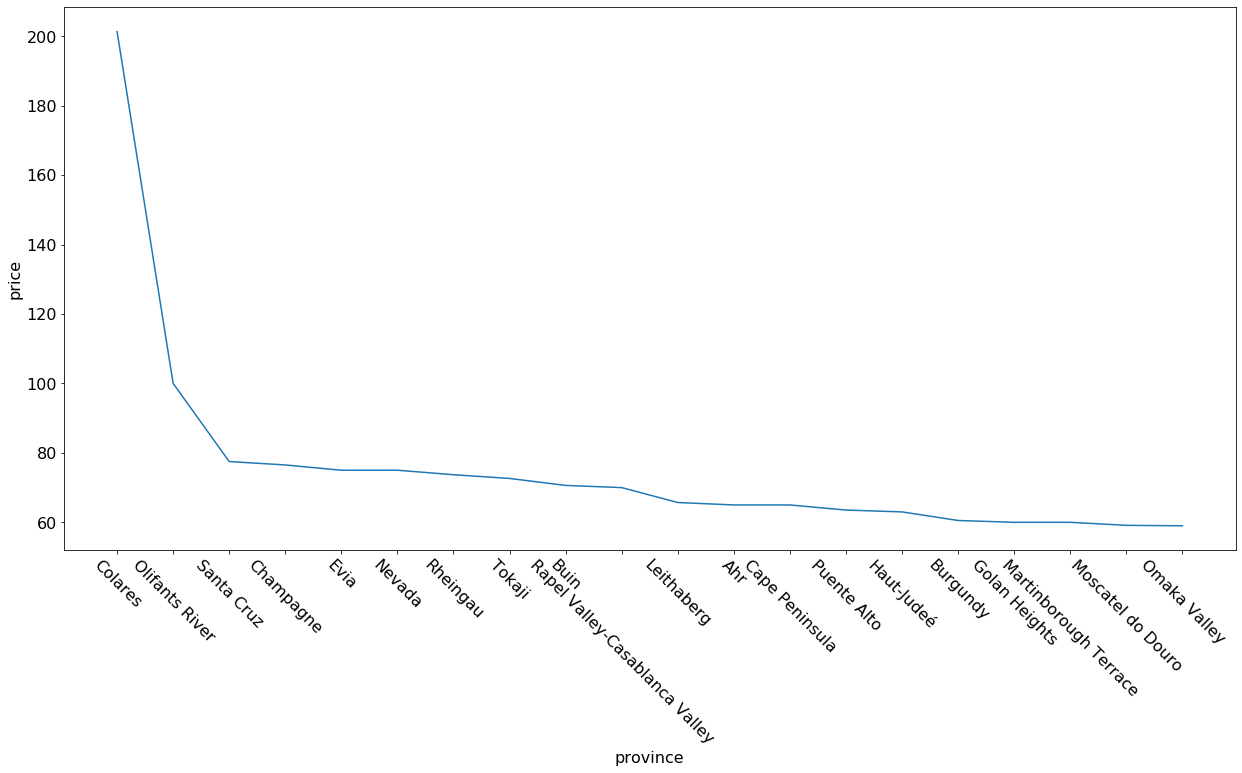

In [91]:
temp2 = data5.groupby('province')['price'].mean().nlargest(20)
plt.figure(figsize = (21,10))
plt.rc('font', size = 16)
x1 = temp2.index.values
y1 = temp2.values
plt.plot(x1, y1)
plt.xlabel('province')
plt.ylabel('price')
plt.xticks(rotation = - 45 )

In [64]:
temp3 = data5.groupby('province')['points', 'price'].mean()
tt = temp3.reset_index()
tt.loc[tt['province'] == 'Colares',:]

C:\Users\BIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,province,points,price
80,Colares,90.666667,201.333333


In [65]:
bts = data4.loc[:,['price','points']]

In [66]:
data4 = data4.reset_index()

In [67]:
myfunc = lambda x: abs(x)
vecfun = np.vectorize(myfunc)

from sklearn.preprocessing import Normalizer
price  = bts.price.values.reshape(-1,1)
points = bts.points.values.reshape(-1,1)
pricen = Normalizer().fit(price)
pointsn = Normalizer().fit(points)
norm_price = pricen.transform(price)
norm_points = pointsn.transform(points)
norm_price

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [68]:
why = bts.describe()

In [69]:
why = why.reset_index()

In [70]:
pm = why.loc[why['index'] == 'mean',:].price.values
poim = why.loc[why['index'] == 'mean',:].points.values

In [71]:
ps = why.loc[why['index'] == 'std',:].price.values
pois = why.loc[why['index'] == 'std',:].points.values

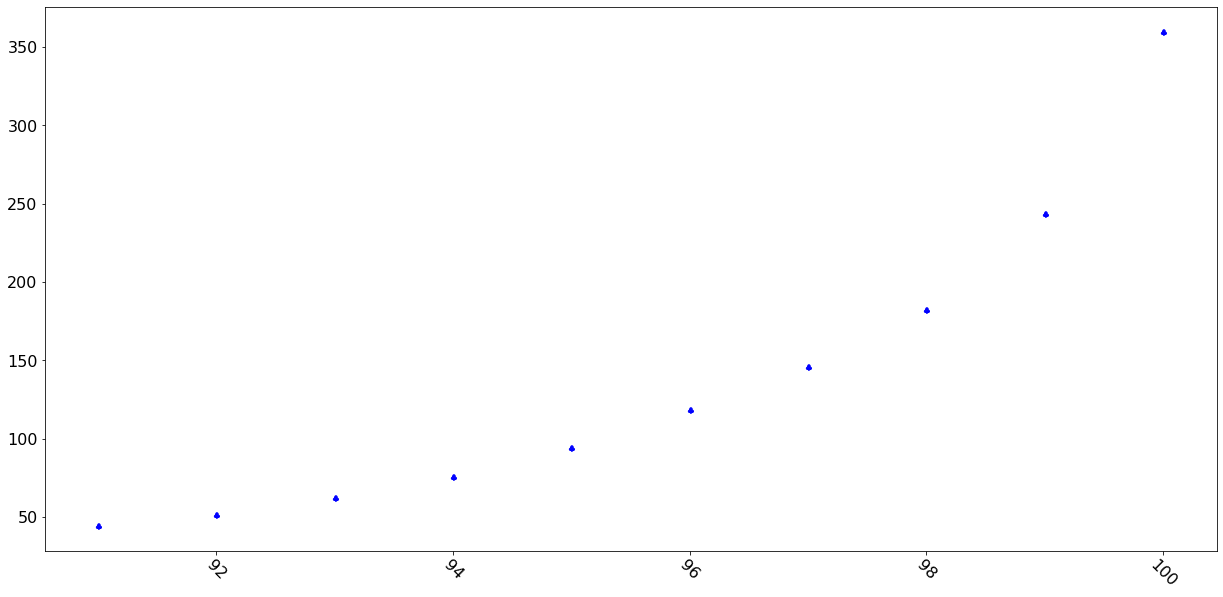

In [72]:
temp3 = data5.groupby('points')['price'].mean().nlargest(10)
x1 = temp3.index.values
y1 = temp3.values
plt.figure(figsize = (21,10))
plt.rc('font', size = 16)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABMcAAAJVCAYAAADa7ZIlAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdf7Ddd13n8dc7SbnIIksaIs4Qa4sVmTKsEC8GV1Z+ZQgglN2BkBHM7MJqdtkVHHeBsZBRVFwYhJUZlI2Aw5otArLIUEbHANOksG5DvK2gjQiLloRKCCm3AQKxocln/zjn2tvDTXvuzU1Obj+Px8yZk/s9n/O97zOT+89zPt/vqdZaAAAAAKBHqyY9AAAAAABMijgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdGvNpAdYioc97GHt8ssvn/QYAAAAAKwQN9100+2ttfWjx1dkHLv88sszMzMz6TEAAAAAWCGq6tBCx11WCQAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAAkSQ4fTjZvTrZuTY4fn/Q0F8aaSQ8AAAAAwMVhx45k795k9epk3bpk165JT3T+2TkGAAAAQGZnkz17kjNnBo99+5KTJyc91fknjgEAAAB07tSpZOPGZGoqWTO8zvDQoWTLlsnOdSG4rBIAAACgc0ePJkeODCLZnNOnkwMHJjfThWLnGAAAAEDnNmxItm1Lqu4+tmpVsnPn5Ga6UMQxAAAAgM5VJbt3D+4xtmlTsn17cuJEH3HMZZUAAAAAJBncc2z//klPcWHZOQYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6NFceqaktVXV9VX6mqO6vqtqr6o6q6at6ap1RVW+BxfIHzra2qd1XV7VX1rar6eFU9djk/GAAAAADcl3G/rfLSJDcleXuSY0kuS/LLSfZX1WNba4fmrX1Fkr+Y9/Nd809UVZXkuiRXJHl5kjuSXJNkb1U9rrV221I+CAAAAAAs1lhxrLX23iTvnX+sqg4k+dskL0jylnkvfba1dm9f+nl1kicleVprbe/wXDcmuTXJqzOIawAAAABw3p3LPce+Nnz+ziLfd3WSL8+FsSRprX09yUeSPO8c5gEAAACARVlUHKuq1VX1gKr64SS/l+QrSd43suw9VXW6qr5WVX9YVZeNvP6YJLcscPqDSS6rqgcvZiYAAAAAWKpx7zk251NJfmz47y9kcGnkV4c/fz2DyytvSPKNJI9P8pokN1bV4+etuzTJFxc49+zweW2SE4ucCwAAAAAWbbFxbHuShyR5ZJJXJvlYVT2ptfbF1tpfJvnLeWtvqKpPJDmQwX3Edg6PV5K2wLnr3n5xVe1IsiNJLrtsdDMaAAAAACzeoi6rbK19trX2qeEN+p+e5MEZfGvl2dbfnOTzSZ4w7/BsBrvHRq0dPt9xlnO9o7U23VqbXr9+/WLGBgAAAIAFLfmG/K214xlcWnnlfSwd3Sl2MIP7jo26Ksnh1ppLKgEAAAC4IJYcx6rq4UkeneTv7mXNdJJHZXCvsjnXJXlEVT153rqHJHnu8DUAAAAAuCDGuudYVX0oyc1J/iqDm+0/KskvJbkrg5vwp6rek+TW4brjGdyQ/5ok/5DkbfNOd12SG5NcW1WvyuAyymsy2GH2pnP+RAAAAAAwpnFvyL8/yQuT/NckD0jypST7kryhtfbF4ZpbkvxMkpcneVCSryT54yS/2lq7fe5ErbUzVfWcJG9O8vYkD8wglj21tfalc/w8AAAAADC2am2hL468uE1PT7eZmZlJjwEAAADAClFVN7XWpkePL/meYwAAAACw0oljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0a6w4VlVbqur6qvpKVd1ZVbdV1R9V1VUj636gqv53VX29qr5RVX9cVZctcL61VfWuqrq9qr5VVR+vqscu14cCAAAAgHGMu3Ps0iQ3JfmFJM9Ick2SxyTZX1U/mCRV9aAk1yd5dJJ/m2R7kh9Osreq/tnciaqqklyX5JlJXp7k+UkuGa7bsAyfCQAAAADGsmacRa219yZ57/xjVXUgyd8meUGStyT5+SSPTPIjrbUvDNf8VZL/l+Q/JPnvw7deneRJSZ7WWts7XHdjkluTvDrJK87tIwEAAADAeM7lnmNfGz5/Z/h8dZL9c2EsSVprtyb58yTPm/e+q5N8eS6MDdd9PclHRtYBAAAAwHm1qDhWVaur6gFV9cNJfi/JV5K8b/jyY5LcssDbDiaZf2+ye1t3WVU9eDEzAQAAAMBSLXbn2KeS3Jnk80n+RQaXRn51+NqlSe5Y4D2zSdbO+/ne1mVk7T+pqh1VNVNVM8eOHVvk2AAAAADw3RYbx7YneWKSFyX5RpKPVdXl815vC7ynFvh5nHX30Fp7R2tturU2vX79+rEHBgAAAICzWVQca619trX2qeEN+p+e5MFJfnn48h0Z7AobtTb33Ck2ey/rkoV3lQEAAADAslvyDflba8eTfCHJlcNDBzO4n9ioq5L8zbyf723d4dbaiaXOBAAAAACLseQ4VlUPT/LoJH83PHRdkidW1SPnrbk8yU8OX8u8dY+oqifPW/eQJM8dWQcAAAAA59WacRZV1YeS3JzkrzK419ijkvxSkruSvGW47J1JfiHJh6tqZwb3FfuNJF/K4Jst51yX5MYk11bVqzK4jPKaDO459qZz/DwAAAAAMLZxd47tT/Kvk/xBkj9J8l+S3JDkca21zydJa+1bSZ6WwTdZ/q8k70lyawbfaPlPl0q21s4keU6SjyV5e5IPJTmd5KmttS8tw2cCAAAAgLFUawt9ceTFbXp6us3MzEx6DAAAAABWiKq6qbU2PXp8yfccAwAAAICVThwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdOs+41hVvaCqPlhVh6rqZFV9rqreUFXfO2/N5VXVzvJ46Mj5HlhVv1VVR4bnu7Gqfup8fDgAAAAAuDdrxljzyiSHk7wmyW1JHp/kdUmeWlX/srV2Zt7aNyS5buT93xz5+feT/HSSVyX5+yT/OcmeqvqJ1tqnF/0JAAAAAGCJxoljz22tHZv38w1VNZvkD5I8Jcn18177+9ba/rOdqKp+NMmLkry0tfbu4bEbkhxM8utJrl7c+AAAAACwdPd5WeVIGJvzF8PnRyzy912d5DtJ3j/v/HcleV+SLVU1tcjzAQAAAMCSLfWG/E8ePn925Pgbququqvp6VV1XVY8def0xSW5trX175PjBJA9IcuUS5wEAAACARRvnssp7qKpHZHAJ5MdbazPDw3cm+b0kH01yLMmjM7hH2f+tqh9vrc1FtEuT3LHAaWfnvQ4AAAAAF8Si4lhVPTjJh5PcleQlc8dba0eS/Md5Sz9ZVX+WwY6w1yb52blTJGkLnXqM370jyY4kueyyyxYzNgAAAAAsaOzLKqvqgRl8E+Ujk2xprd12b+tba19K8n+SPGHe4dksvDts7bzXz3a+d7TWpltr0+vXrx93bAAAAAA4q7HiWFVdkuSDSX48ybNba3895vlHd4odTHJFVT1oZN1VSU4l+cKY5wUAAACAc3afcayqViV5T5KnJ3lea23/OCeuqsuS/GSST807fF2SS5JsnbduTZJtST7aWrtz/NEBAAAA4NyMc8+x380gZv1mkm9V1RPnvXZba+22qnpLBqHtxgxuyP8jSa5JcibJf5tb3Fr7dFW9P8lbh7vRbk3ysiRXJHnxMnweAAAAABjbOHHsWcPn1w4f8/1aktdlcLnky5L8uyTfm+T2JNcn+bXW2udG3vOSDELb65M8NMlnkjyztXbz4scHAAAAgKWr1hb68siL2/T0dJuZmZn0GAAAAACsEFV1U2ttevT42N9WCQAAADDn8OFk8+Zk69bk+PFJTwNLN85llQAAAAD3sGNHsndvsnp1sm5dsmvXpCeCpbFzDAAAAFiU2dlkz57kzJnBY9++5OTJSU8FSyOOAQAAAGM7dSrZuDGZmkrWDK9HO3Qo2bJlsnPBUrmsEgAAABjb0aPJkSODSDbn9OnkwIHJzQTnws4xAAAAYGwbNiTbtiVVdx9btSrZuXNyM8G5EMcAAACAsVUlu3cP7jG2aVOyfXty4oQ4xsrlskoAAABg0aamkv37Jz0FnDs7xwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOjWfcaxqnpBVX2wqg5V1cmq+lxVvaGqvndk3dqqeldV3V5V36qqj1fVYxc43wOr6req6sjwfDdW1U8t54cCAAAAgHGMs3PslUlOJ3lNkmcm+R9JXpbkY1W1KkmqqpJcN3z95Umen+SSJHurasPI+X4/yc8n+ZUkz0lyJMmeqnrcOX8aAAAAAFiENWOseW5r7di8n2+oqtkkf5DkKUmuT3J1kicleVprbW+SVNWNSW5N8uokrxge+9EkL0ry0tbau4fHbkhyMMmvD88DAAAAABfEfe4cGwljc/5i+PyI4fPVSb48F8aG7/t6ko8ked68912d5DtJ3j9v3V1J3pdkS1VNLWp6AAAAADgHS70h/5OHz58dPj8myS0LrDuY5LKqevC8dbe21r69wLoHJLlyifMAAAAAwKItOo5V1SMyuATy4621meHhS5PcscDy2eHz2jHXXbrYeQAAAABgqRYVx4Y7wD6c5K4kL5n/UpK20FsW+HmcdQv97h1VNVNVM8eOLXSlJwAAAAAszthxrKoemME3Uj4yyZbW2m3zXp7Nwru+5naM3THmutkFXkuStNbe0Vqbbq1Nr1+/ftyxAQAAAOCsxopjVXVJkg8m+fEkz26t/fXIkoMZ3E9s1FVJDrfWTsxbd0VVPWiBdaeSfGHcwQEAAADgXN1nHKuqVUnek+TpSZ7XWtu/wLLrkjyiqp48730PSfLc4Wvz112SZOu8dWuSbEvy0dbanUv5EAAAAACwFGvGWPO7GcSs30zyrap64rzXbhteXnldkhuTXFtVr8rgMsprMriX2JvmFrfWPl1V70/y1uFutFuTvCzJFUlevAyfBwAAAADGNs5llc8aPr82gwA2//FzSdJaO5PkOUk+luTtST6U5HSSp7bWvjRyvpckeXeS1yf5kyQ/kOSZrbWbz+mTAAAAAMAiVWsLfXnkxW16errNzMxMegwAAAAAVoiquqm1Nj16fOxvqwQAAACA+xtxDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAnDeHDyebNydbtybHj096GoDvtmbSAwAAAHD/tWNHsndvsnp1sm5dsmvXpCcCuCc7xwAAADgvZmeTPXuSM2cGj337kpMnJz0VwD2JYwAAACy7U6eSjRuTqalkzfCapUOHki1bJjsXwCiXVQIAALDsjh5NjhwZRLI5p08nBw5MbiaAhdg5BgAAwLLbsCHZti2puvvYqlXJzp2TmwlgIeIYAAAAy64q2b17cI+xTZuS7duTEyfEMeDi47JKAAAAzpupqWT//klPAXB2do4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAujVWHKuqDVX1tqq6saq+XVWtqi5fYF07y+NxI+tWVdU1VfXFqvrHqvpMVT1/eT4SAAAAAIxn3J1jVyZ5YZI7knzyPtb+zyQ/MfL4/Mia30jyuiS/k+RZSfYn+UBVPXvMeQAAAADgnK0Zc90nWmsPT5Kq+rkkz7iXtf/QWtt/ther6vuSvDLJG1trbx4e3ltVVyZ5Y5I/HXMmAAAAADgnY+0ca62dWcbfuSXJA5JcO3L82iSPraorlvF3AQAAAMBZnY8b8r+squ4c3pvs+qr6VyOvPybJnUm+MHL84PD5qvMwEwAAAAB8l+WOY9cm+U9JNifZkWRdkuur6inz1lya5HhrrY28d3be69+lqnZU1UxVzRw7dmx5pwYAAACgS+Pec2wsrbXt8378ZFV9OMktSV6f5EnD45VkNIzNHb+3c78jyTuSZHp6eqH3AwAAAMCinI/LKv9Ja+2bSf4kyRPmHZ5NsraqRmPY2nmvAwAAAMB5d17j2NDoTrGDSaaS/NDIurl7jf3NBZgJAAAAAM5vHKuqhyT56SSfmnf4z5KcSvLikeU/m+SW1tqt53MmAADg4nT4cLJ5c7J1a3L8+KSnAaAXY99zrKpeMPznjw2fn1VVx5Ica63dUFWvTPIjSfYm+XKSH0zyyiTfn3khrLX21ar67STXVNU3k9ycZFuSpyV53jl+HgAAYIXasSPZuzdZvTpZty7ZtWvSEwHQg8XckP8DIz+/ffh8Q5KnJPlckn8zfPzzJN9I8udJ/n1r7cDIe1+b5ESSX8wgnn0uyQtbax9ZzPAAAMD9w+xssmfP4N9Vyb59ycmTyfd8z0THAqAD1drK++LH6enpNjMzM+kxAACAZXDqVPKoRyVf+Upy+nTSWnLJJckTnpB84hOTng6A+4uquqm1Nj16fDE7xwAAAJbd0aPJkSODSDbn9OnkwOj1JwBwHlyIb6sEAAA4qw0bkm3bBpdTzlm1Ktm5c3IzAdAPcQwAAJioqmT37sE9xjZtSrZvT06cEMcAuDBcVgkAAFwUpqaS/fsnPQUAvbFzDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAK87hw8nmzcnWrcnx45OeBgBYydZMegAAAFisHTuSvXuT1auTdeuSXbsmPREAsFLZOQYAwIoyO5vs2ZOcOTN47NuXnDw56akAgJVKHAMAYMU4dSrZuDGZmkrWDK+BOHQo2bJlsnMBACuXyyoBAFgxjh5NjhwZRLI5p08nBw5MbiYAYGWzcwwAgBVjw4Zk27ak6u5jq1YlO3dObiYAYGUTxwAAWDGqkt27B/cY27Qp2b49OXFCHAMAls5llQAArDhTU8n+/ZOeAgC4P7BzDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRrrDhWVRuq6m1VdWNVfbuqWlVdvsC6B1bVb1XVkao6OVz/UwusW1VV11TVF6vqH6vqM1X1/HP/OAAAAAAwvnF3jl2Z5IVJ7kjyyXtZ9/tJfj7JryR5TpIjSfZU1eNG1v1Gktcl+Z0kz0qyP8kHqurZY08OAAAAAOdozZjrPtFae3iSVNXPJXnG6IKq+tEkL0ry0tbau4fHbkhyMMmvJ7l6eOz7krwyyRtba28evn1vVV2Z5I1J/nTpHwcAAAAAxjfWzrHW2pkxll2d5DtJ3j/vfXcleV+SLVU1NTy8JckDklw78v5rkzy2qq4YZyYAAAAAOFfLeUP+xyS5tbX27ZHjBzOIYVfOW3dnki8ssC5JrlrGmQAAAADgrJYzjl2awT3JRs3Oe33u+Xhrrd3HOgAAAAA4r5YzjlWS0eA1d3wp6+75YtWOqpqpqpljx44tcUQAAAAAuNtyxrHZLLzra+281+ee11bVaAwbXXcPrbV3tNamW2vT69evP+dhAQAAAGA549jBJFdU1YNGjl+V5FTuvsfYwSRTSX5ogXVJ8jfLOBMAAAAAnNVyxrHrklySZOvcgapak2Rbko+21u4cHv6zDGLZi0fe/7NJbmmt3bqMMwEAAADAWa0Zd2FVvWD4zx8bPj+rqo4lOdZau6G19umqen+St1bVJUluTfKyJFdkXghrrX21qn47yTVV9c0kN2cQ0J6W5Hnn/IkAAAAAYExjx7EkHxj5+e3D5xuSPGX475ck+c0kr0/y0CSfSfLM1trNI+99bZITSX4xyfcn+VySF7bWPrKIeQAAAADgnFRrC31x5MVtenq6zczMTHoMAOAid/hw8tKXJmvXJu98Z/LQh056IgAAJqWqbmqtTY8eX8zOMQCAFWXHjmTv3mT16mTdumTXrklPBADAxWY5b8gPAHDRmJ1N9uxJzpwZPPbtS06enPRUAABcbMQxAOB+59SpZOPGZGoqWTPcJ3/oULJly2TnAgDg4uOySgDgfufo0eTIkUEkm3P6dHLgwORmAgDg4mTnGABwv7NhQ7JtW1J197FVq5KdOyc3EwAAFydxDAC436lKdu8e3GNs06Zk+/bkxAlxDACA7+aySgDgfmtqKtm/f9JTAABwMbNzDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAEkOH042b062bk2OH5/0NAAAwIWyZtIDAMDFYMeOZHMfzysAABGvSURBVO/eZPXqZN26ZNeuSU8EAABcCHaOAdC92dlkz57kzJnBY9++5OTJSU8FAABcCOIYAF07dSrZuDGZmkrWDPdTHzqUbNky2bkAAIALw2WVAHTt6NHkyJFBJJtz+nRy4MDkZgIAAC4cO8cA6NqGDcm2bUnV3cdWrUp27pzcTAAAwIUjjgHQtapk9+7BPcY2bUq2b09OnBDHAACgFy6rBIAM7jm2f/+kpwAAAC40O8cAAAAA6JY4BgAAAEC3xDEAAAAAuiWOAQAAANAtcQwAAACAboljAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAi3T4cLJ5c7J1a3L8+KSnAQAA4FysmfQAACvNjh3J3r3J6tXJunXJrl2TnggAAIClsnMMYBFmZ5M9e5IzZwaPffuSkycnPRUAAABLJY4BjOnUqWTjxmRqKlkz3Hd76FCyZctk5wIAAGDpXFYJMKajR5MjRwaRbM7p08mBA5ObCQAAgHNj5xjAmDZsSLZtS6ruPrZqVbJz5+RmAgAA4NyIYwBjqkp27x7cY2zTpmT79uTECXEMAABgJXNZJcAiTU0l+/dPegoAAACWg51jAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuLWscq6qnVFVb4HF8ZN3aqnpXVd1eVd+qqo9X1WOXcxYAAAAAuC/na+fYK5L8xLzH5rkXqqqSXJfkmUlenuT5SS5JsreqNpyneeCCO3w42bw52bo1OX78vtcDAAAAF96a83Tez7bW9p/ltauTPCnJ01pre5Okqm5McmuSV2cQ1mDF27Ej2bs3Wb06Wbcu2bVr0hMBAAAAoyZxz7Grk3x5LowlSWvt60k+kuR5E5gHlt3sbLJnT3LmzOCxb19y8uSkpwIAAABGna849p6qOl1VX6uqP6yqy+a99pgktyzwnoNJLquqB5+nmeCCOHUq2bgxmZpK1gz3Zh46lGzZMtm5AAAAgO+23JdVfj3JW5LckOQbSR6f5DVJbqyqx7fWvprk0iRfXOC9s8PntUlOLPNccMEcPZocOTKIZHNOn04OHJjcTAAAAMDClnXnWGvtL1trr2ytfaS1dkNr7a0Z3Hj/4bn7XmKVpC3w9rq3c1fVjqqaqaqZY8eOLefYsKw2bEi2bUtq3v/oVauSnTsnNxMAAACwsPN+z7HW2s1JPp/kCcNDsxnsHhu1dvh8x1nO847W2nRrbXr9+vXLPygsk6pk9+7BPcY2bUq2b09OnBDHAAAA4GJ0vr6tctT83WIHkzxjgTVXJTncWnNJJfcLU1PJ/rN9ZysAAABwUTjvO8eqajrJo5J8anjouiSPqKonz1vzkCTPHb4GAAAAABfEsu4cq6r3JLk1yc1JjmdwQ/5rkvxDkrcNl12X5MYk11bVqzK4jPKaDHaXvWk55wEAAACAe7Pcl1XekuRnkrw8yYOSfCXJHyf51dba7UnSWjtTVc9J8uYkb0/ywAxi2VNba19a5nkAAAAA4KyqtYW+OPLiNj093WZmZiY9xrI5fDh56UuTtWuTd74zeehDJz0RAAAAwP1LVd3UWpsePX6hbsjPvdixI9m7N1m9Olm3Ltm1a9ITAQAAAPThvN+Qn3s3O5vs2ZOcOTN47NuXnDw56akAAAAA+iCOTdCpU8nGjcnUVLJmuIfv0KFky5bJzgUAAADQC5dVTtDRo8mRI4NINuf06eTAgcnNBAAAANATO8cmaMOGZNu2pOruY6tWJTt3Tm4mAAAAgJ6IYxNUlezePbjH2KZNyfbtyYkT4hgAAADAheKyyovA1FSyf/+kpwAAAADoj51jAAAAAHRLHAMAAACgW+IYAAAAAN0SxwAAAADoljgGAAAAQLfEMQAAAAC6JY4BAAAA0C1xDAAAAIBuiWMAAAAAdEscAwAAAKBb4hgAAAAA3RLHAAAAAOiWOAYAAABAt8QxAAAAALoljgEAAADQLXEMAAAAgG6JYwAAAAB0SxwDAAAAoFviGAAAAADdEscAAAAA6Fa11iY9w6JV1bEkhyY9B4zhYUlun/QQwNj8zcLK4m8WVg5/r7Cy3F//Zn+wtbZ+9OCKjGOwUlTVTGttetJzAOPxNwsri79ZWDn8vcLK0tvfrMsqAQCA/9/encbaVZVxGH/eezsABRnEATACdQAZRBAFRAUUQY2UoaQiBscgIAii8AFxIBAVBE2cgsEaREHGGCBAlYBGwCpKEEzEOoAoKA5MCqV0oK8f1jr1eKWWtveeffbdzy8hcM89m6zz4b17n/9a612SJHWW4ZgkSZIkSZI6y3BMmljnNT0ASavFmpXaxZqV2sN6ldqlUzVrzzFJkiRJkiR1livHJEmSJEmS1FmGY5IkSZIkSR0WEVMjYquImNL0WJrQyQ8tTbSI2AaYA2wGLADmZuYTzY5K0spYs1J7WK9Su1iz0vCLiABmA58C5kXEqZm5qOFhDZQ9x6RxFhFvAOYBjwMPANOAZcBumflYk2OT9L+sWak9rFepXaxZqT0iYhPgfGAn4EFg78x8vNlRDY7bKqVxFBG7Ad8DLgBel5k7ALOAvwPf7uoSVWlYWbNSe1ivUrtYs1J7RMSUzHwYOAr4MbAL8NFmRzVYhmPSOImIdYGzgZ8A52TmXQCZuYDyYPBSYHpzI5TUz5qV2sN6ldrFmpXaJTOX1ZVjBwAHARcB5zQ7qsEyHJPGz6bAy4HrMvO3ABHRu+k/BGwNbBoR1p00HKxZqT2sV6ldrFmpRSJiQ+Aw4IuUrdBHZubCZkc1WC5llcbPDGARsBQgIqZl5uKI2Az4GHBTZv6xyQFK+i/WrNQe1qvULtasNOQiIjIzazD2TspKsWuBIzLzyTHvGcnM5U2Od6KZ1EtrISKmR8SOsGKZ+MXAJyNiF+A5EfEi4EpgS+Cqvut2jIidI2JqE+OWumpNa1bS4K1JvboKRWrOatbs1c2NVOq2iJgGUEOvjXmaYCwiRnvvqZetX6+dtPdZT6uU1kJE7AMcA5yZmbfX5eLnAXsCy4EXAOsAl2XmYfWajYCvUHot/AY4pkungEhNWpOaHXN9pDdOaSBWo16vyMw5fdeNAqOZuaSBYUudtYbPxZtSnolfCdwN/KC3YkXS+IuI7SirN08FHqEEY59nTDCWmU/V97+cst3yLZRTZ38HHD8Zv79O2tRPGpB7gFcBR0fE5pm5ODPfDXwQuIvyAPC9vgeA0cx8FPgQ8C1gM+BnEbF+M8OXOmd1a3Za/fcI/Gf2bDLPmklD5JnU6/XA2wEi4kURMRu4EfhxRMyLiHMiYkZD45e6ZnXvsRsDpwA/Aj5HmTy+PiI2aGT0UjeMAocDXwJOoARj1wDvqsHYlL5g7ATgEuAjwHzgTmAm8PPJeG915Zi0liJiJ8qD+HzgXsofjRMpvRZ+kZmH1PdNqaeAjGTm8vrlekvKjNqDlKR+WROfQeqSVdTsncDBY1eHRcR6lHqdCbwJ2BA4rmuNSqVBe6b1GhFvpEw8vQ34PuUY+k2A3YGNgd0z87GBfwCpY1ZRs3dk5sH1fUFZMfZr4HRKMPYyyoqW5wOvycxFgx6/1AV1NdjNwAaUFWOH1p6AU3rfRyPidODdwJ+B9/QdrLF1vWZuZn6hkQ8wQQzHpHEQEdsCx1IewkeAXwHXZOZl9fdTVhZ8RcSJwAeAPTPz4QENWeq0ldTstZl5af39TEpvhTcCr6YEY9tR+hodBkwFLqQ8LEzq5qRS055Bvb4BOJPyRft84KS+We+ZwFzKTPl+mbl48J9A6paV1Ox1mXlJ33sC2J4SpO2amffViePtKffXczPzawMfvNQRdXvlLfWf4zPz3r7fnQQcD9wBfDAz76+Haiypv78NuDUzjx38yCeOp1VK4yAzF0TEhzPzqYjYoH92eswfklFgeZ3lnpqZS4G/AtsAW0bEI/YzkibeKmr2M5RtWtMoW0QeAD4N3A7sDOwN/Ba42mBMmnirqNedgI8DuwJPAq8BfhIRZ2fm5ZSVK2cBR1AC7l8M/ANIHbOKmt0LOBB4LeUeu5Da6LvurLgX2JSyUlvSBMnMu+rk0nzgjIg4MTMfjIjdgSMp989eMDba9312a2CL+vtJxXBMGj+9L8lP9L/Y3xC4N5NdjdTjrD8B3AbcaTAmDVSvZlc0FK03/MPrj/tl5q/7jrDeH/gG8Efgy5l5db3GJv3SxPuveu1rFjyLElh/g7JqLIA3AxdFxMOZeWNE/BBYSlm9Imkwnu4euyult9hM4HIggUXAZRGxH7AY2J/Sm2xhvcZ7rDRBMvOOiNgNmJOZD9aXD6eEX2/tC8Z6q7FnUCaQN6Rsiaa+PjIZJozdVilNkIh4NeXm/yxgPcoqlGmUngvPArYFdqKEaacAF0+GPypSm0XEFMpWym8CN2Vmr9H3LOBc4H7g9My8tr7uQ7vUkIh4LiXwupHSSLg3q70BcAXwF+Do/q2U1qzUnNrc+xzgvZl5Yd1auRWlGXivufe6wKPAHrYbkQYrIjan9Oy8IDNPe5odULMoh8pdkZnv7btuRYDWZq4ck8ZZvdGvRzn5Y0/gPsoNfwnQW1aewJ8oX8AvoTQoNRiTGlYPzbgeeA/wnYj4FrX3CQZj0rDZgXK/PT8zl/T6e2bmYxGxDrDF2B5j1qzUqB2Bf2TmhfXnkcz8Q0TMBQ4FPkMJx27IzEcny2oUqUUeoazgfAr+swOqHky1P/B14KeUA3CIiI0ok8oH1hPe7wY+m5mP/+//evgZjknjrD54L4yII4FbgV9SGhr+k7K0PCirNp9sbpSSVqZuobwB2A/4ATCbUsenZeb3wWBMGhKPUu6to7Ai3J5Caeg9E7hlssxmS5PE7cDrImJ7YEFfbQbwAuBHvS/VBmNSI0Yp7UNeEhHPzsyHIuKFlGfh04CfA+/LzMcjYh9KSHYQZbXZYspK0NkRsWsbA7KRpgcgTVaZuQB4PSVNPxlYnJlL6iy2p2VJQ6oGX08Bz6P0KRoBphmMSUPnPuAhYE5EbFFXbr8COINyPP0ZtSF4NDlISStcR7mnHgdsDitOzDuEEnavCLINxqTBq4HWycABwJURMQ+4gXIi9NXA7Hqy7IHA2ZTVZIcB+2bmvsAcymKQM5oY/9qy55g0wSJiF+Am4CLK8fKPreISSQ2LiDdRHgJupzwUzAGOocxqe+OUhkQ9rfJG4PeUfp6bANMpvcYuNcyWhkut2XmUmp1KmYjaGDi0HqBhzUoNi4htgfdTemT/inJw3MX1d/tSToF+DvDOzLx5TNP+7wAbAQe0beW24Zg0ABGxM/AzShPST2bm0oaHJOn/iIiXUPqMfTkzr4qI5wNPZOa/Gh6apDEi4sWUmeutKNssv5qZ9zQ6KEkrVWv2fZSDqZLStuC2ZkclaayxYXV9Hp4L7AW8JTNviYgRSleSjIjpwPXAXzLzHc2Mes0ZjkkDUvsrHAycZTgmDb+IWL+v94kz2VIL9GrVmpWGW1+t2ltMaomIOAK4ADgkM68cW79158V3gTMz89NNjXNNGY5JA+TDutQ+1q00/AzFpHbpr1XrVhputXfnOpTgaxkwi9I/cHlfHW9J6Su4ENij1/OzTbXtaZXSALXpj4OkwrqVhl+vTq1XqR36a9W6lYZbrdFFETEDuK/+vKKfWD3R8gpgBnBUG4Mx8LRKSZIkSZIkPY0opgH3AOtFxEb19ekRsRdwLfBc4ATgVmhn6O22SkmSJEmSJK1URGwHzAduAu4Gtgb2qf/9EWB+Zi5pboRrx3BMkiRJkiRJ/1dE7ACcCmwL/A24g3Li7JONDmwcGI5JkiRJkiRpleoWy1FgaWYuq6+1rsfYWIZjkiRJkiRJWm2TIRgDwzFJkiRJkiR1mKdVSpIkSZIkqbMMxyRJkiRJktRZhmOSJEmSJEnqLMMxSZIkSZIkdZbhmCRJkiRJkjrLcEySJEmSJEmdZTgmSZIkSZKkzjIckyRJkiRJUmcZjkmSJEmSJKmzDMckSZIkSZLUWf8GDok37Py+/44AAAAASUVORK5CYII=
plt.xticks(rotation = - 45 )
plt.scatter(x1,y1, marker=r'$\clubsuit$', color = 'b')

Text(0, 0.5, 'price')

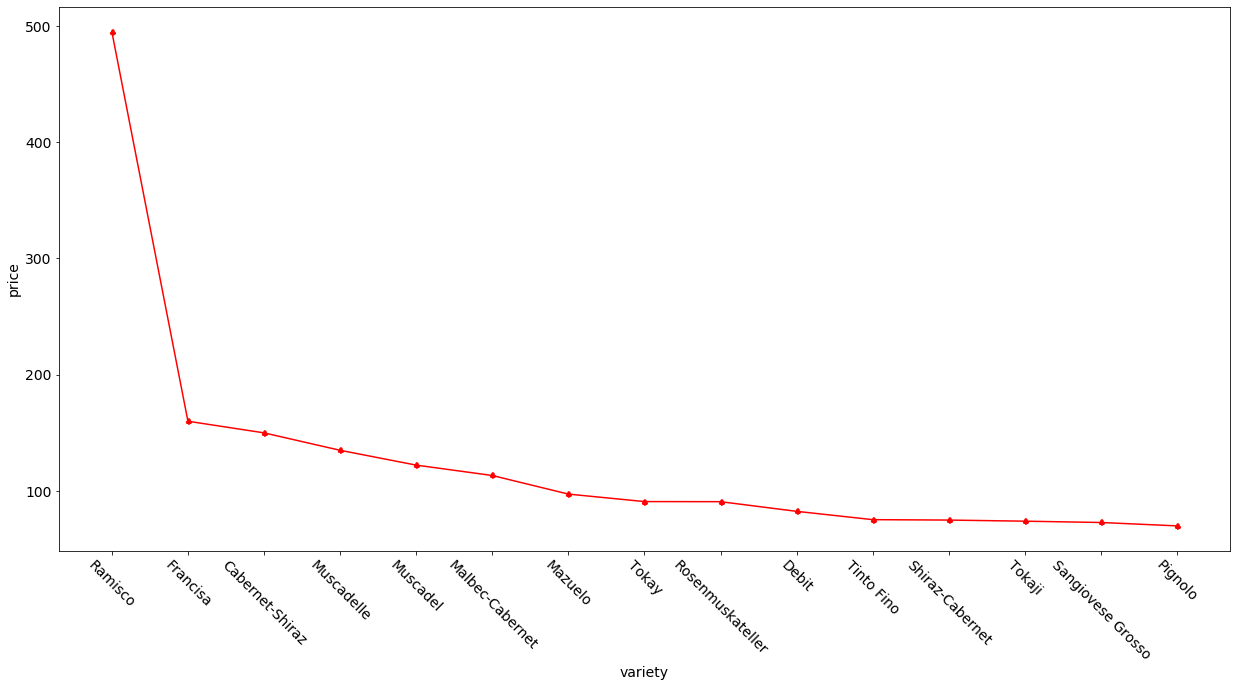

In [98]:
temp4 = data5.groupby('variety')['price'].mean().nlargest(15)
x1 = temp4.index.values
y1 = temp4.values
plt.figure(figsize = (21,10))
plt.rc('font', size = 14)
plt.xticks(rotation = - 45 )
plt.plot(x1,y1, marker=r'$\clubsuit$', color = 'red')
plt.xlabel('variety')
plt.ylabel('price')

종속변수: price,  독립변수: province
가설1: province는 price에 영향을 미칠 것이다. 

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [188]:

heat = data5.loc[:,['price','points']]
heat.corr()

,price,points
price,1.000000,0.449507
points,0.449507,1.000000


Text(0, 0.5, 'price')

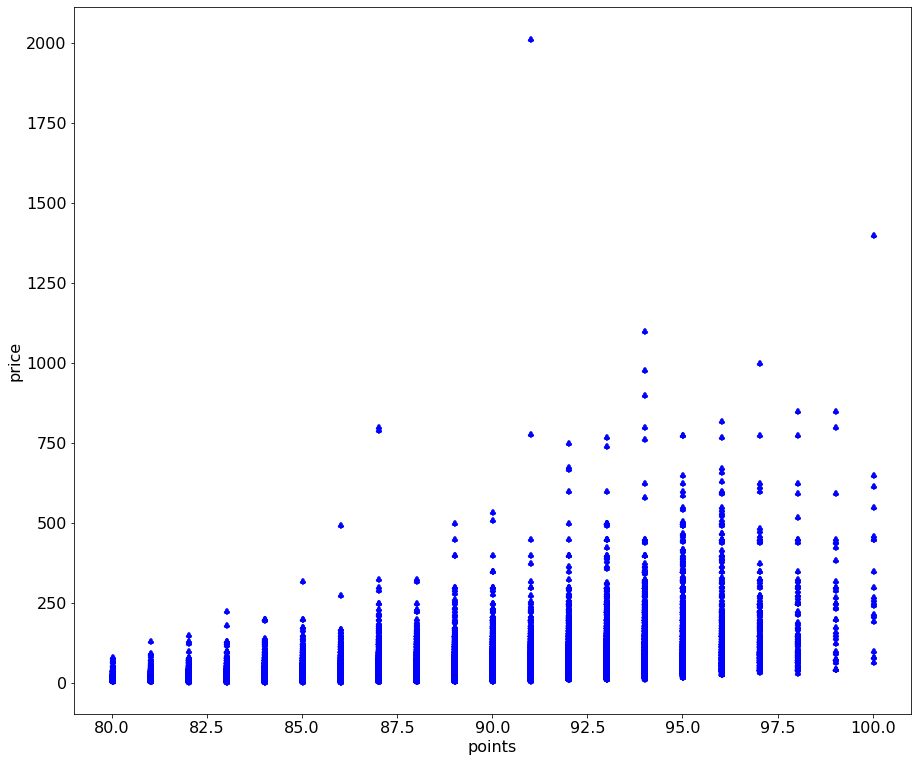

In [183]:
from sklearn.preprocessing import StandardScaler
x12 = data5.points.values.reshape(-1,1)
y12 = data5.price.values.reshape(-1,1)


plt.figure(figsize = (15,13))
plt.scatter(x12,y12,marker=r'$\clubsuit$', color = 'b')
plt.xlabel('points')
plt.ylabel('price')

In [241]:
from sklearn.model_selection import train_test_split
X = data5.price.values
y = data5.points.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [242]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [243]:
new_data = pd.DataFrame(np.concatenate((X_train,y_train),axis=1), columns = ['price','points'])

In [244]:
new_data

,price,points
0,50.0,90.0
1,16.0,89.0
2,35.0,87.0
3,14.0,89.0
4,35.0,89.0
...,...,...
23725,120.0,92.0
23726,38.0,90.0
23727,50.0,92.0
23728,21.0,87.0


In [245]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

new_data = new_data.rename(columns={"points" :
                             "partner_status_points"}) # make name pythonic
moore_lm = ols('price ~ C(price, Sum)*C(partner_status_points, Sum)',
                 data=new_data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
print(table)

C:\Users\BIT\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 245, but rank is 113



                                                   sum_sq       df  \
C(price, Sum)                                4.548223e+08    245.0   
C(partner_status_points, Sum)                1.451858e+05     20.0   
C(price, Sum):C(partner_status_points, Sum)  2.131143e+08   4900.0   
Residual                                     5.844482e-18  22218.0   

                                                        F  PR(>F)  
C(price, Sum)                                7.057235e+27     0.0  
C(partner_status_points, Sum)                2.759645e+25     0.0  
C(price, Sum):C(partner_status_points, Sum)  1.653390e+26     0.0  
Residual                                              NaN     NaN  


C:\Users\BIT\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 4900, but rank is 1512



In [247]:
new_data = new_data.rename(columns={"partner_status_points" :
                             "points"})